In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\shree\Desktop\DSA\Assignment and competetion\Assignment #03 - Measures of Central Tendency and Dispersion\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.size

8000

In [7]:
df.shape

(1000, 8)

1. Find out how many males and females participated in the test.

In [8]:
df['gender'].value_counts() 

female    518
male      482
Name: gender, dtype: int64

2. What do you think about the students' parental level of education?


Below graph show average of each score attained by children with parents having diiferent level of education . Children’s educational outcomes are strongly correlated with their parents’ educational attainment

<Axes: xlabel='parental level of education'>

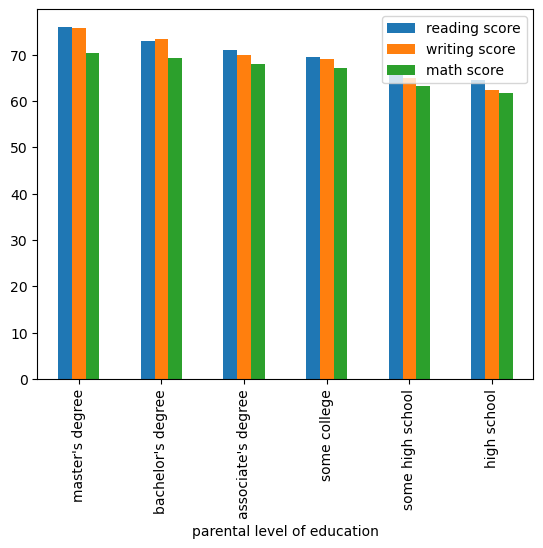

In [9]:
df.groupby(['parental level of education']).mean(numeric_only = True).sort_values(by = ['reading score','math score','writing score'],ascending=False)[['reading score','writing score','math score']].plot(kind = 'bar')

3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [10]:
avg_score_gender = df.groupby(['gender']).mean(numeric_only = True).sort_values(by = ['reading score','math score','writing score'],ascending=False)[['reading score','writing score','math score']]
avg_score_gender

,reading score,writing score,math score
gender,,,
female,72.590734,72.467181,63.376448
male,65.545643,63.446058,68.821577


<Axes: title={'center': ' Avg score based on Gender'}, xlabel='gender'>

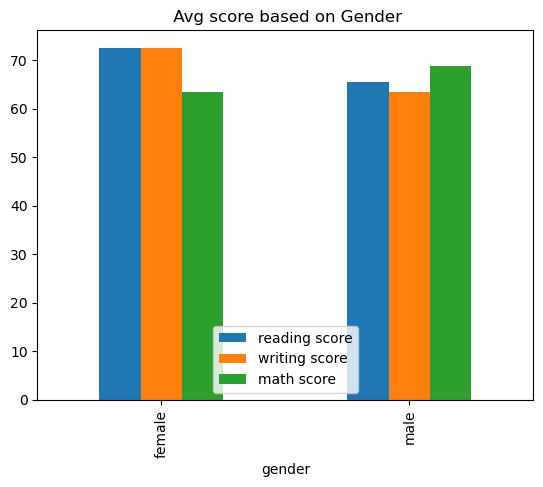

In [11]:
## Plot shows that Female has better score on average
avg_score_gender.plot(kind = 'bar',title =' Avg score based on Gender')

In [12]:
avg_score_prep = df.groupby(['test preparation course']).mean(numeric_only = True).sort_values(by = ['reading score','math score','writing score'],ascending=False)[['reading score','writing score','math score']]
avg_score_prep

,reading score,writing score,math score
test preparation course,,,
completed,74.175978,74.684358,69.96648
none,66.417445,64.457944,63.78972


Below Plot shows that those eho have completed the test preparation course has better scores 

<Axes: title={'center': ' Avg score based on Test preparation course'}, xlabel='test preparation course'>

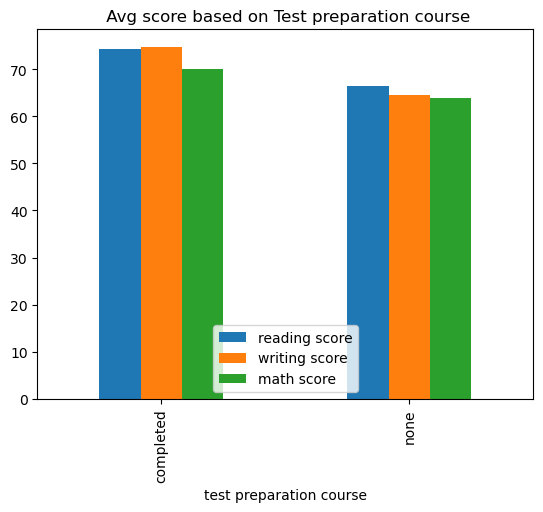

In [13]:


avg_score_prep.plot(kind = 'bar',title =' Avg score based on Test preparation course')


4 What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

In [ ]:
## below shows the variation values based on Gender.

In [34]:
df[['gender','math score','reading score','writing score']].groupby('gender').std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [35]:
## below shows the variation values based on Test preparation course.
df[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


5 The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this.

In [41]:
srt_math = df.sort_values('math score',ascending=False)
srt_math

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


In [42]:
q75 = srt_math['math score'].quantile(q=0.75)
srt_math[(srt_math['math score']>=q75)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,77,62,62
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
421,female,group C,some college,free/reduced,none,77,90,91
